<a href="https://colab.research.google.com/github/giorginolab/MD-Tutorial-Data/blob/main/notebooks/2a_MDAnalysis_analysis.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# MD analysis: Gelsolin WT/mutant, apo/nanobody example
*Camilla Caprai, IBF-CNR, Italy* - www.giorginolab.it

This is a Python notebook, based on Google Colaboratory platform. For an introduction to the platform, see [here](https://colab.research.google.com/notebooks/welcome.ipynb). You will be able to edit Python statements on this notebook by entering them into "cells", and execute them with the "play" button.

Notes:
 * The order of execution matters, not the order of display.
 * To start from scratch, restart the runtime.
 * Shell commands: prefix with an ! symbol.  E.g. `!ls -l` lists the contents of the current directory.
 * If you don't have a Google account, you may copy-paste the  statements in  local Python installations.
 * To plot, see examples [here](https://colab.research.google.com/notebooks/charts.ipynb).

The class is based on the following paper:

> Giorgino T, Analysis libraries for molecular trajectories: a cross-language synopsis. Chapter 20 in:  Biomolecular Simulations: Methods and Protocols Edited by M. Bonomi and C. Camilloni (Springer, ISBN 978-1-4939-9608-7).  [Preprint here](https://github.com/giorginolab/preprints-repository/tree/master/analysis_libraries_chapter)

and on the biological example from:

> Giorgino T, Mattioni D, Hassan A, Milani M, Mastrangelo E, Barbiroli A, et al. Nanobody interaction unveils structure, dynamics and proteotoxicity of the Finnish-type amyloidogenic gelsolin variant. Biochimica et Biophysica Acta (BBA) - Molecular Basis of Disease. 2019 Mar 1;1865(3):648–60. [Journal version](https://www.sciencedirect.com/science/article/pii/S0925443919300109?via%3Dihub). [Preprint here](https://arxiv.org/abs/1903.07308).





# Retrieve simulation trajectories

This copies data on the server which is running the calculations (not your computer). See below to download files to your PC.

In [ ]:
%pwd

'/content'

In [ ]:
# Get the data files if not there yet
! [ -f MD-Tutorial-Data ] || git clone https://github.com/giorginolab/MD-Tutorial-Data.git

Cloning into 'MD-Tutorial-Data'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 93 (delta 31), reused 22 (delta 6), pack-reused 22 (from 1)
Receiving objects: 100% (93/93), 102.69 MiB | 13.34 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Updating files: 100% (26/26), done.


In [ ]:
%ls -l MD-Tutorial-Data/GSN

total 66824
-rw-r--r-- 1 root root  3505896 Mar 30 19:23 D187N+Nb-run.pdb
-rw-r--r-- 1 root root  4938249 Mar 30 19:23 D187N+Nb-run.psf
-rw-r--r-- 1 root root  9578580 Mar 30 19:23 D187N+Nb-run-subset.xtc
-rw-r--r-- 1 root root  2086286 Mar 30 19:23 D187N-run.pdb
-rw-r--r-- 1 root root  2877716 Mar 30 19:24 D187N-run.psf
-rw-r--r-- 1 root root  8284912 Mar 30 19:23 D187N-run-subset.xtc
-rw-r--r-- 1 root root      670 Mar 30 19:24 load-all.vmd
-rw-r--r-- 1 root root      718 Mar 30 19:24 README.md
-rw-r--r-- 1 root root  3505653 Mar 30 19:24 WT+Nb-run.pdb
-rw-r--r-- 1 root root  4937615 Mar 30 19:24 WT+Nb-run.psf
-rw-r--r-- 1 root root 14860688 Mar 30 19:24 WT+Nb-run-subset.xtc
-rw-r--r-- 1 root root  2086286 Mar 30 19:24 WT-run.pdb
-rw-r--r-- 1 root root  2877395 Mar 30 19:24 WT-run.psf
-rw-r--r-- 1 root root  8856064 Mar 30 19:24 WT-run-subset.xtc


# Download results to your PC

To download any file (not necessary, but may be useful to inspect results), use the little "folder" icon on the left.

# Install Python libraries

Should be done via either pip or conda. We may already have them.

In [ ]:
%pip install mdanalysis
# %pip install mdtraj
# %pip install moleculekit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.3 MB/s eta 0:00:00




---


## Analysis starts here

We will make use of Python (and its Numpy library) functions to answer a series of questions.

Rewriting them in one of the other libraries and languages may be an useful exercise.

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import align, rms
# import moleculekit as mk
# import mdtraj as mdt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mda.__version__

'2.9.0'

In [ ]:
# The file set we plan to analyze.
# In this case it may be WT, WT+Nb, D187N, D187N+Nb.

pdb="MD-Tutorial-Data/GSN/WT+Nb-run.pdb"
xtc="MD-Tutorial-Data/GSN/WT+Nb-run-subset.xtc"


In [ ]:
# The Universe is the central object in MDAnalysis,
# linking static topology (atom identities) with dynamic trajectory (coordinates)
m=mda.Universe(pdb, xtc)

In [ ]:
m

<Universe with 43279 atoms>

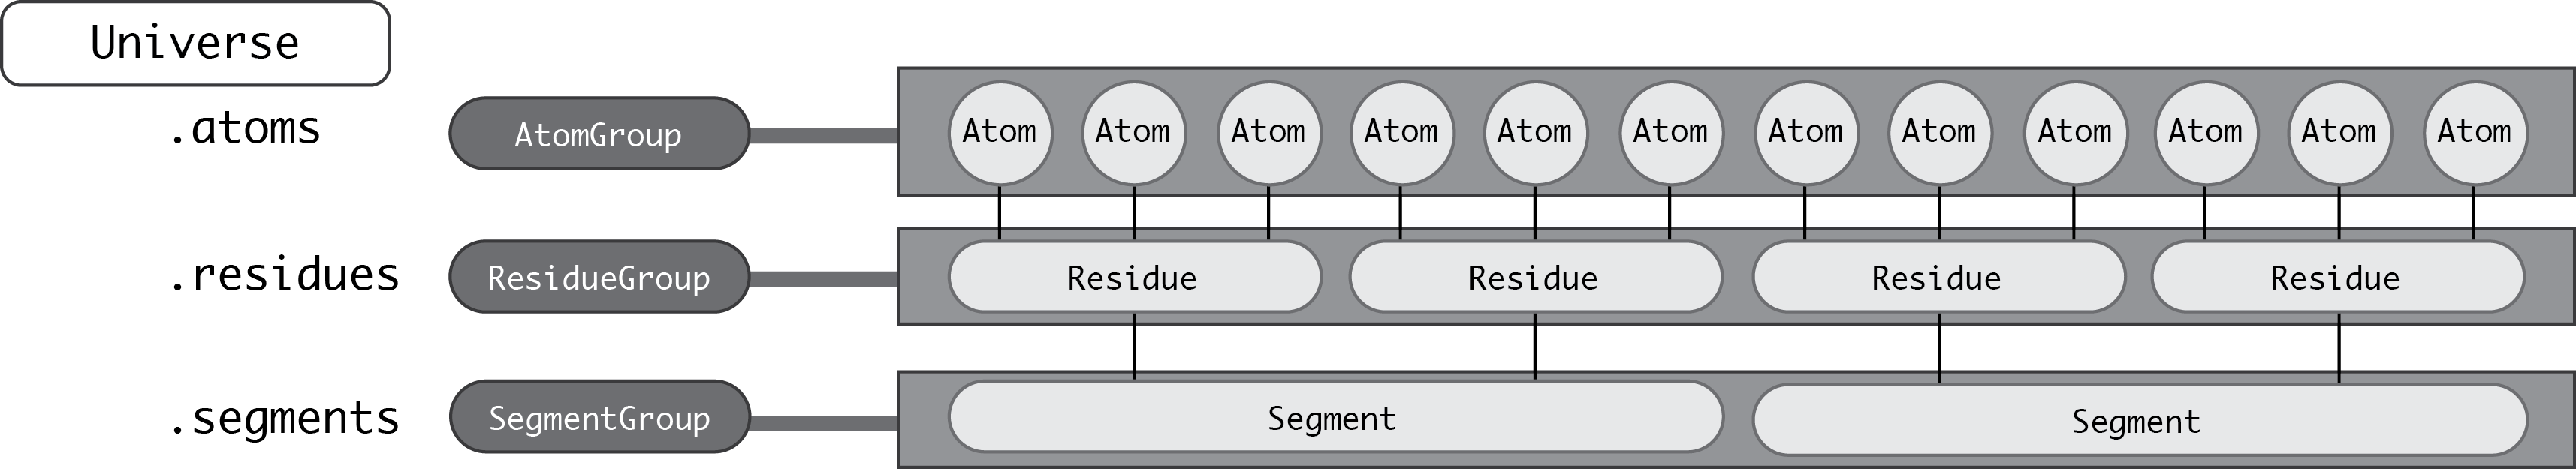


**Illustration from MDAnalysis**



---


# Exercises

Write code to answer the following questions

## Residues?

How is it possible that there are so many "residues"?

In [ ]:
#@title Hint... {display-mode: "form"}
print(set(res.resname for res in m.residues))

{'CAL', 'VAL', 'ARG', 'ALA', 'PRO', 'ILE', 'TIP3', 'HSE', 'HSD', 'ASN', 'THR', 'GLN', 'CLA', 'MET', 'SER', 'PHE', 'LEU', 'GLU', 'ASP', 'LYS', 'CYS', 'SOD', 'TYR', 'TRP', 'GLY'}


In [ ]:
# Write your answer here


---


## How many chains are there?

Note that these are simulation structures, and may use chains for different purposes than crystallographic structures. We extract actual chain information from each atom's property.

**[Note:  MDAnalysis has another classification called "Segments", which mostly, but not entirely, overlaps chains.]**

In [ ]:
#@title Answer... {display-mode: "form"}

m.segments


<SegmentGroup with 8 segments>



---


## How many residues and atoms per each chain?

Hint: use

    for c in m.segments:
        # do something with c

In [ ]:
# Write your answer here


In [ ]:
#@title Solution... {display-mode: "form"}

for c in m.segments:
  print(f"Chain {c.segindex} has {len(c.residues)} residue, {len(c.atoms)} atoms")  # QUESTION

Chain 0 has 126 residue, 1872 atoms
Chain 1 has 50 residue, 148 atoms
Chain 2 has 102 residue, 1590 atoms
Chain 3 has 7606 residue, 22818 atoms
Chain 4 has 4986 residue, 14958 atoms
Chain 5 has 380 residue, 1140 atoms
Chain 6 has 232 residue, 696 atoms
Chain 7 has 57 residue, 57 atoms




---


## How many Cα atoms?

In [ ]:

# Write your answer here


In [ ]:
#@title Solution... {display-mode: "form"}
len(list(m.select_atoms("name CA")))

228



---


## How many frames? How many nanoseconds?

In [ ]:
# Write your answer here

In [ ]:
#@title Solution... {display-mode: "form"}
m.trajectory.n_frames        #QUESTION

80



---


## Is your structure solvated? If so, remove solvent.

In [ ]:
len(list(m.atoms)), len(list(m.select_atoms("not water")))

# Write your answer here

(43279, 3520)

In [ ]:
#@title Solution... {display-mode: "form"}
no_water = m.select_atoms("not water")

# If you want to visualize, uncomment the following code:
# no_water.write("no_water.pdb")
# with mda.Writer("no_water.xtc", no_water.n_atoms) as W:
#    for ts in m.trajectory:
#        W.write(no_water)

In [ ]:
no_water # Notice that no_water is not a 'Universe' but an 'AtomGroup',
         # meaning that it does NOT contain dynamic info from the trajectory.

<AtomGroup with 3520 atoms>



---


## How many species of ions and how many of each are there?

In [ ]:
print(set(res.resname for res in no_water.residues))

{'CAL', 'VAL', 'ARG', 'ALA', 'PRO', 'ILE', 'HSE', 'HSD', 'ASN', 'THR', 'GLN', 'CLA', 'MET', 'SER', 'PHE', 'LEU', 'GLU', 'ASP', 'LYS', 'CYS', 'SOD', 'TYR', 'TRP', 'GLY'}


In [ ]:
# Write your answer here

**Hint**. Use the following:

`for ion in ["CAL","CLA","SOD"]:`

In [ ]:
#@title Solution... {display-mode: "form"}
for ion in ["CAL","CLA","SOD"]:
    ions = [a.index for a in no_water.atoms if a.resname == ion]    #QUESTION
    print(f"There are {len(ions)} atoms of type {ion}")

There are 2 atoms of type CAL
There are 31 atoms of type CLA
There are 25 atoms of type SOD




---


## Keep only chain D and align the simulation to the G2's first frame

Now keep only chain D (segid 3). \
 For atom selections, refer to:
 https://userguide.mdanalysis.org/stable/selections.html

In [ ]:
cD = no_water.select_atoms("protein and segid 3") # Remember this is an 'AtomGroup'

# write your answer here

In [ ]:
#@title Solution... -- Keep only chain D  {display-mode: "form"}

# Save everything for visualization
cD.write("chainD.pdb")

with mda.Writer("chainD.xtc", cD.n_atoms) as W:
    for ts in m.trajectory:
        W.write(cD)

mD = mda.Universe("chainD.pdb", "chainD.xtc") # Create a new Universe with only the chain D

/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"



Then, align to the first frame (frame 0).

**Note**: Due to the high flexibility of the C-terminal region, we will not align those residues.

When performing the alignment, select `resid 1-239`.


\
For info on the alignment, refer to: https://userguide.mdanalysis.org/stable/examples/analysis/alignment_and_rms/aligning_trajectory_to_frame.html#Aligning-a-trajectory-to-the-first-frame

In [ ]:
# We first need to create a reference to which align the entire trajectory:

ref = mD.copy() # Copy of the original Universe
ref.trajectory[0] # set reference trajectory to first frame

< Timestep 0 with unit cell dimensions [ 62.11672  67.50577 104.50721  90.       90.       90.     ] >

In [ ]:
#@title Solution... -- Align to frame 0 {display-mode: "form"}

align.AlignTraj(mD, ref,
                select='resid 1-239',
                filename='aligned_to_first_frame.xtc').run() # Save for visualization

In [ ]:
mDa = mda.Universe("chainD.pdb", "aligned_to_first_frame.xtc") # Create a new aligned Universe

In [ ]:
!ls -l

total 1088
-rw-r--r-- 1 root root 486836 Mar 30 19:24 aligned_to_first_frame.xtc
-rw-r--r-- 1 root root 128916 Mar 30 19:24 chainD.pdb
-rw-r--r-- 1 root root 486684 Mar 30 19:24 chainD.xtc
drwxr-xr-x 7 root root   4096 Mar 30 19:24 MD-Tutorial-Data
drwxr-xr-x 1 root root   4096 Mar 24 13:34 sample_data




---


## Inspect the shape of the coordinates.

MDAnalysis uses atoms x 3

In [ ]:
mDa.atoms.positions.shape

(1590, 3)



---


## Compute backbone global RMSD(t)

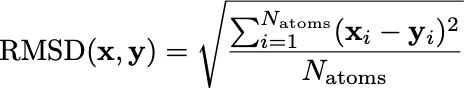


RMSD quantifies how much a structure diverges from a reference over time.

In MDAanalysis: https://docs.mdanalysis.org/stable/documentation_pages/analysis/rms.html#MDAnalysis.analysis.rms.RMSD

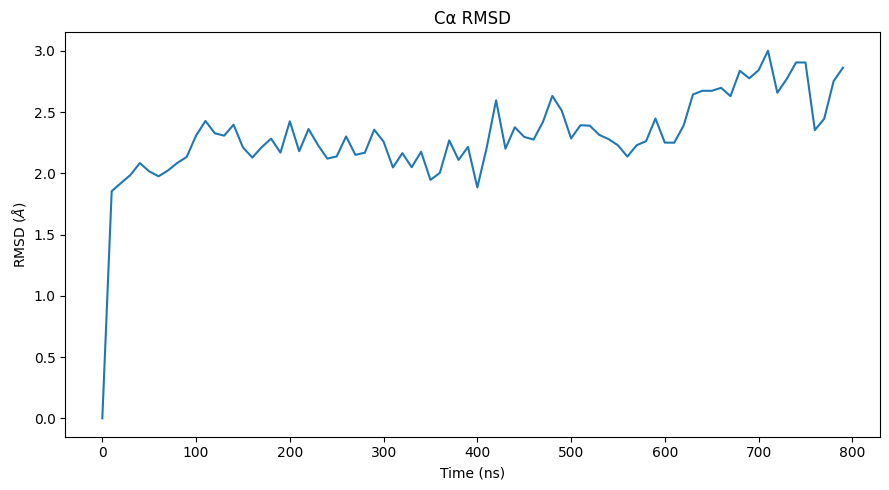

In [ ]:
rmsd_analysis = rms.RMSD(mDa,
                         ref,
                         selection='name CA and resid 1-239',
                         ref_frame=0)
rmsd_analysis.run()
rmsd = rmsd_analysis.rmsd.T

# MDAnalysis RMSD array shape (n_frames, 3):
#   Column 0: frame index
#   Column 1: time (in ps)
#   Column 2: RMSD (Å)
#
# Transposing yields a (3, n_frames) shape:
#   rmsd[0] -> frame indices
#   rmsd[1] -> times
#   rmsd[2] -> RMSD values

fig, ax = plt.subplots(1, figsize=(9,5))
ax.plot(rmsd[0]*10, rmsd[2])

ax.set_xlabel("Time (ns)")
ax.set_ylabel("RMSD ($\AA$)")
ax.set_title("Cα RMSD")

plt.tight_layout()



---


## Compute the RMSF.
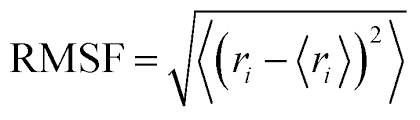

The root-mean-square-fluctuation (RMSF) of a structure is the time average of the RMSD. It can reveal which areas of the system are the most mobile.

In MDAnalysis: https://docs.mdanalysis.org/stable/documentation_pages/analysis/rms.html#MDAnalysis.analysis.rms.RMSF

/usr/local/lib/python3.11/dist-packages/MDAnalysis/analysis/rms.py:1000: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


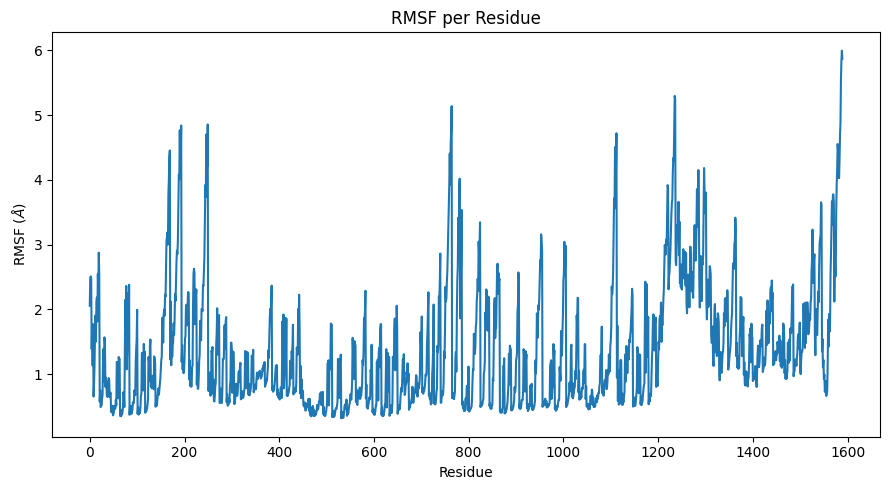

In [ ]:
Ca = mDa.select_atoms('protein')

rmsf_analysis = rms.RMSF(Ca).run()
rmsf = rmsf_analysis.rmsf

# Plotting
fig, ax = plt.subplots(1, figsize=(9,5))
ax.plot(rmsf)
ax.set_xlabel("Residue")
ax.set_ylabel(r"RMSF ($\AA$)")
ax.set_title("RMSF per Residue")

plt.tight_layout()